# Correlação

O conteúdo desta aula está presente nos slides que estão juntos com o jupyter notebook.

Aqui iremos criar uma função para calcular o Coeficiente de Correlação de Pearson.

$$\rho = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i(x_i - \bar{x})^2}\cdot\sqrt{\sum_i(y_i - \bar{y})^2}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pearson(x, y):
    """ Calcula o Coeficiente de Correlação de Pearson
    
    x : list
        List of values for the independent coordinates
    y : list
        List of values for the dependent coordinates
    """
    # Convete todos os valores para array do numpy para facilitar os cálculos
    x = np.array(x)
    y = np.array(y)
    
    # Calcular valores médios
    xm = x.mean()
    ym = y.mean()
    
    numerator = np.sum((x - xm)*(y - ym))
    denominator = np.sqrt(np.sum((x-xm)**2))*np.sqrt(np.sum((y-ym)**2))
    
    rho = numerator/denominator
    
    return rho

Vamos testar com um conjunto de números lineares

In [3]:
a = np.arange(20)
b = np.arange(20)+10

In [4]:
print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


In [5]:
pearson(a, b)

1.0

In [6]:
# Invertendo a lista de b para ter uma correlação negativa
pearson(a, b[::-1])

-1.0

In [7]:
# Testando se a correlação permite obter correlação com uma variável ao quadrado
pearson(a, b**2)

0.9914328639355028

## Aplicação a dados reais

Agora vamos aplicar para um banco de dados de Exoplanetas

In [8]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

In [9]:
# Obtemos os dados das colunas 'pl_bmasse' e 'pl_rade' tabela "pscomppars".
# Estas colunas dão a massa e raio dos exoplanetas em massas e raios terrestres
data = NasaExoplanetArchive.query_criteria(table='pscomppars', select='pl_bmasse, pl_rade')

In [10]:
data

pl_bmasse,pl_rade
earthMass,earthRad
float64,float64
250.0,13.9
16.6,2.9
5.1,2.11
12.2,3.52
4.94,2.07
13.2,2.76
422.7139,13.6
1131.1513,13.1


In [11]:
m = data['pl_bmasse']
r = data['pl_rade']

In [12]:
# Criamos uma máscara para remover as linhas onde o raio ou a massa não estão determinados
mask = np.where((r.value > 0) & (m.value > 0))

In [13]:
pearson(m[mask],r[mask])

0.3244269076955163

(0.0, 20000.0)

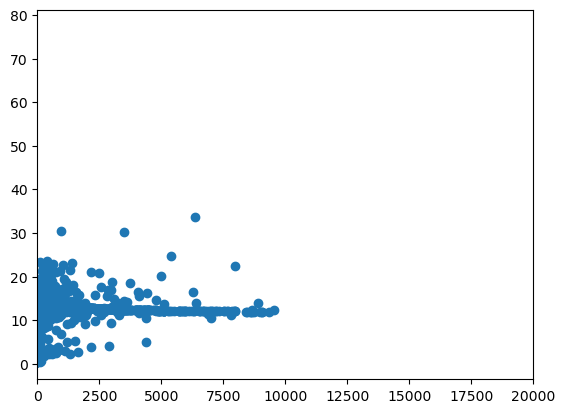

In [14]:
import matplotlib.pyplot as plt
plt.plot(m[mask], r[mask], 'o')
plt.xlim(0, 20000)

Visualmente, realmente parece que não há correlação entre a massa e o raio dos exoplanetas. Porém, se o raio de um planeta aumenta, a não ser que a densidade diminua de forma considerável, então a massa também deveria aumentar.

Vamos dar uma olhada se plotarmos os logaritmos dos valores, invés dos próprios valores.

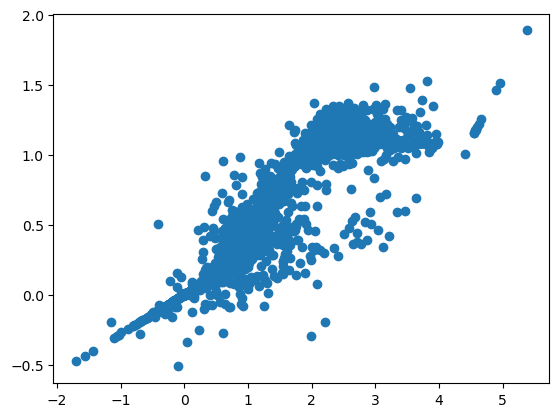

In [15]:
plt.plot(np.log10(m[mask].value), np.log10(r[mask].value), 'o')

Vendo o gráfico do logaritmo, eu esperaria que tivesse realmente uma correlação entre a massa e o raio. Vamos calcular o coeficiente de correlação para esses valores

In [16]:
pearson(np.log10(m[mask].value), np.log10(r[mask].value))

0.927426012067645

Então realmente existe uma correlação entre esses dois valores, mas a correlação não é linear como esperado pelo método de Pearson. Para obter outros coeficientes de correlação, vamos utilizar as ferramentas do scipy.

In [17]:
from scipy import stats

In [18]:
stats.pearsonr(m[mask], r[mask])

PearsonRResult(statistic=0.3244269076955162, pvalue=9.686275152151309e-135)

Note que a correlação de Pearson dá o mesmo valor que obtivemos anteriormente

In [19]:
stats.spearmanr(m[mask], r[mask])

SignificanceResult(statistic=0.9396778062640588, pvalue=0.0)

Já o coeficiente de correlação de Spearman consegue recuperar a informação que existe correlação entre as duas grandezas, mas não é possível dizer de que maneira essa correlação se apresenta.